In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Reports/50_Startups.csv")

In [68]:
x = df.drop(columns=["Profit"])
y = df["Profit"]

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [70]:
from sklearn.svm import SVR

regressor = SVR(kernel="linear")

In [71]:
regressor.fit(x_train, y_train)

SVR(kernel='linear')

In [72]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [98]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

In [99]:
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [75]:
print(f"Mean Absolute Error for test set: {mae_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"R-squared Score for test set: {r2_test}")

Mean Absolute Error for test set: 8222.255023514199
Mean Squared Error for test set: 101276064.18122616
R-squared Score for test set: 0.8950775960328647


In [76]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

In [77]:
print(f"Mean Absolute Error for train set: {mae_train}")
print(f"Mean Squared Error for train set: {mse_train}")
print(f"R-squared Score for train set: {r2_train}")

Mean Absolute Error for train set: 7289.655468409255
Mean Squared Error for train set: 102604351.1464002
R-squared Score for train set: 0.9445411168276369


Calculate the number of samples (n) and number of features (p)


In [78]:
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared Score for test set: {adjusted_r2_test}")

Adjusted R-squared Score for test set: 0.8664623949509187


In [79]:
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared Score for train set: {adjusted_r2_train}")

Adjusted R-squared Score for train set: 0.9391741281335372


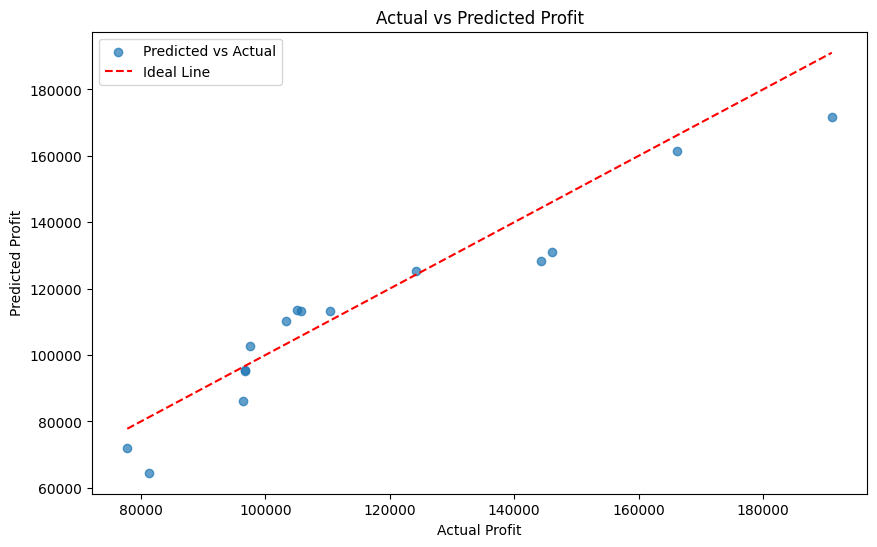

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label="Predicted vs Actual")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Ideal Line",
)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.legend()
plt.show()

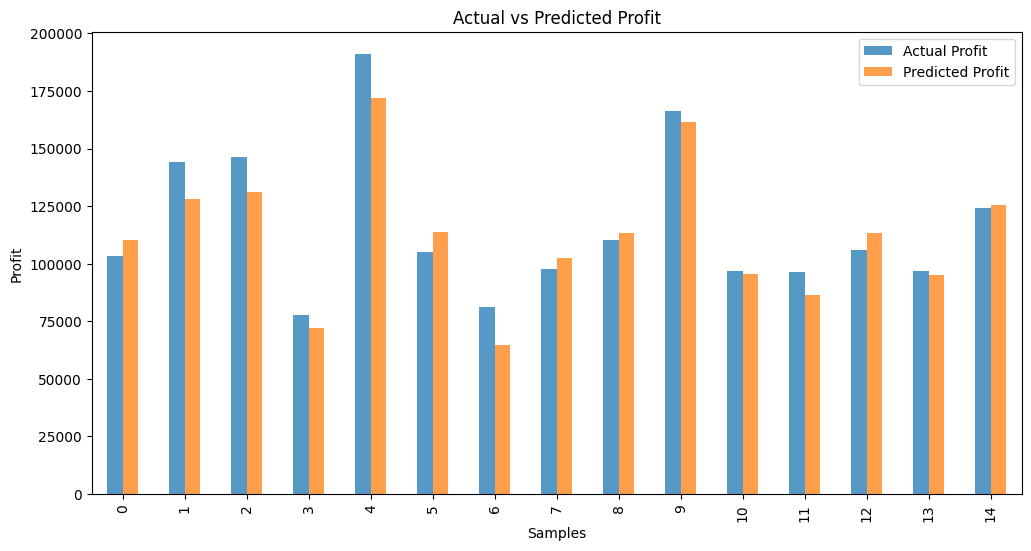

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_test}).reset_index(
    drop=True
)
comparison_df.plot(kind="bar", ax=ax, alpha=0.75)
ax.set_xlabel("Samples")
ax.set_ylabel("Profit")
ax.set_title("Actual vs Predicted Profit")
ax.legend(["Actual Profit", "Predicted Profit"])

plt.show()